In [2]:
import quimb as qu
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
data = np.arange(8)shape((2, 2, 2))
inds = ('k0', 'k1', 'k2')
tags = ('test', )

test_tn = qu.tensor.Tensor(data, inds, tags)

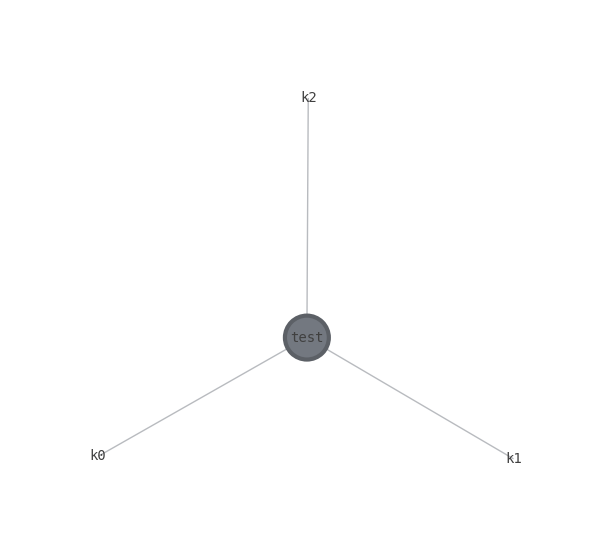

In [3]:
test_tn.draw()

In [4]:
X = qu.tensor.Tensor(qu.pauli('X'), inds=('k0', 'b0'), tags=['PAULI', 'X', '0'])
Y = qu.tensor.Tensor(qu.pauli('Y'), inds=('k1', 'b1'), tags=['PAULI', 'Y', '1'])

In [5]:
TN = test_tn & X & Y

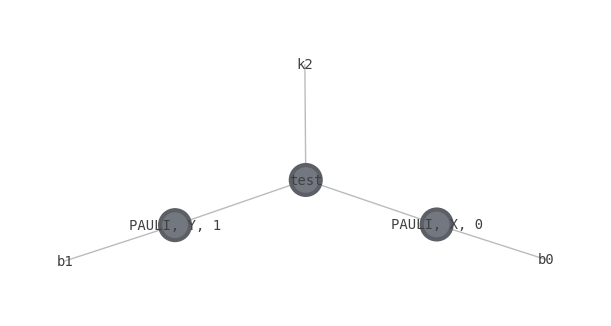

In [6]:
TN.draw()

In [8]:
leftTerminator_array = np.zeros(3)
Dmid_array = np.zeros((12,12))    # bulk node
Dending_array = np.zeros((12,20)) # second-to-last node
Dend_array = np.zeros((20,24))    # last node
rightTerminator_array = np.zeros(6)
h = 0.5**10

In [11]:
leftTerminator_array[0] = 1
leftTerminator_array[1] = 1
leftTerminator_array[2] = 1

Dmid_array[0, 0] = 1
Dmid_array[1, 1] = 1
Dmid_array[2, 2] = 1
Dmid_array[3, 3] = 1

# When sending in 1 from the right: add */
Dmid_array[1+4*0, (0+4*1)] = 1
Dmid_array[0+4*1, (1+4*1)] = 1
Dmid_array[3+4*0, (2+4*1)] = 1 #01->11
Dmid_array[2+4*1, (3+4*1)] = 1 #11->01+

# When sending in 2 from the right: substract */
Dmid_array[1+4*2, (0+4*2)] = 1
Dmid_array[0+4*0, (1+4*2)] = 1
Dmid_array[3+4*2, (2+4*2)] = 1 #01->11-
Dmid_array[2+4*0, (3+4*2)] = 1 #11->01

# Dending *
# When sending in 0 from the right: do nothing */
Dending_array[0, 0] = 1
Dending_array[1, 1] = 1
Dending_array[2, 2] = 1
Dending_array[3, 3] = 1

# When sending in 1 from the right: add */
Dending_array[1+4*0, (0+4*1)] = 1
Dending_array[0+4*1, (1+4*1)] = 1
Dending_array[3+4*0, (2+4*1)] = 1
Dending_array[2+4*1, (3+4*1)] = 1

# When sending in 2 from the right: substract */
Dending_array[1+4*2, (0+4*2)] = 1
Dending_array[0+4*0, (1+4*2)] = 1
Dending_array[3+4*2, (2+4*2)] = 1
Dending_array[2+4*0, (3+4*2)] = 1

# When sending in 3 from the right: add 4h */
Dending_array[0+4*1, (0+4*3)] = 1 #add
Dending_array[1+4*1, (1+4*3)] = 1 #add
Dending_array[2+4*1, (2+4*3)] = 1 #add
Dending_array[3+4*1, (3+4*3)] = 1 #add

# When sending in 4 from the right: substract 4h */
Dending_array[0+4*2, (0+4*4)] = 1 #substract
Dending_array[1+4*2, (1+4*4)] = 1 #substract
Dending_array[2+4*2, (2+4*4)] = 1 #substract
Dending_array[3+4*2, (3+4*4)] = 1 #substract

# Dend */
# When sending in 0 from the right: do nothing */
Dend_array[0, 0] = 1
Dend_array[1, 1] = 1
Dend_array[2, 2] = 1
Dend_array[3, 3] = 1

# When sending in 1 from the right: add */
Dend_array[1+4*0, (0+4*1)] = 1
Dend_array[0+4*1, (1+4*1)] = 1
Dend_array[3+4*0, (2+4*1)] = 1
Dend_array[2+4*1, (3+4*1)] = 1

# When sending in 2 from the right: substract */
Dend_array[1+4*2, (0+4*2)] = 1
Dend_array[0+4*0, (1+4*2)] = 1
Dend_array[3+4*2, (2+4*2)] = 1
Dend_array[2+4*0, (3+4*2)] = 1

# When sending in 3 from the right: go to 2h */
Dend_array[0+4*1, (0+4*3)] = -1 #add
Dend_array[0+4*2, (0+4*3)] = +1 #substract
Dend_array[1+4*1, (1+4*3)] = -1 #add
Dend_array[1+4*2, (1+4*3)] = +1 #substract
Dend_array[2+4*1, (2+4*3)] = -1 #add
Dend_array[2+4*2, (2+4*3)] = +1 #substract
Dend_array[3+4*1, (3+4*3)] = -1 #add
Dend_array[3+4*2, (3+4*3)] = +1 #substract

# When sending in 4 from the right: go to 3h */
# Perform the addition & substraction at this end node, and send instructions to next node */
Dend_array[1+4*1, (0+4*4)] = -1 #add
Dend_array[0+4*2, (1+4*4)] = +1 #substract
Dend_array[3+4*1, (2+4*4)] = -1 #add
Dend_array[2+4*2, (3+4*4)] = +1 #substract
# Special case when remainder must be transferred */
Dend_array[1+4*4, (0+4*4)] = +1 #substract 4h
Dend_array[0+4*3, (1+4*4)] = -1 #add 4h
Dend_array[3+4*4, (2+4*4)] = +1 #substract 4h
Dend_array[2+4*3, (3+4*4)] = -1 #add 4h

# When sending in 5 from the right: go to 4h */
# Add 4h */
Dend_array[0+4*3, (0+4*5)] = -1
Dend_array[1+4*3, (1+4*5)] = -1
Dend_array[2+4*3, (2+4*5)] = -1
Dend_array[3+4*3, (3+4*5)] = -1
# Substract 4h */
Dend_array[0+4*4, (0+4*5)] = +1
Dend_array[1+4*4, (1+4*5)] = +1
Dend_array[2+4*4, (2+4*5)] = +1
Dend_array[3+4*4, (3+4*5)] = +1

# Right terminating array (for Dend) */
# 8th order */
rightTerminator_array[0] = 0 #do nothing
rightTerminator_array[1] = -4/(5*h)  #add at h
rightTerminator_array[2] = +4/(5*h)  #substract at h
rightTerminator_array[3] = -1/(5*h)  #add & substract at 2h
rightTerminator_array[4] = +4/(105*h)#add & substract at 3h
rightTerminator_array[5] = -1/(280*h)#add & substract at 4h

In [ ]:
/* Create the nodes */
Dmid = tntNodeCreate(&Dmid_array, "DLUR", 4, 3, 4, 3);
Dending = tntNodeCreate(&Dending_array, "DLUR", 4, 3, 4, 5);
Dend = tntNodeCreate(&Dend_array, "DLUR", 4, 5, 4, 6);
rightTerminator = tntNodeCreate(&rightTerminator_array, "LR", 6, 1);
leftTerminator = tntNodeCreate(&leftTerminator_array, "LR", 1, 3);
/* Use terminating nodes to produce starting and ending D nodes */
/* First Dstart */
Dmidc = tntNodeCopy(Dmid);
tntNodeJoin(leftTerminator,"R",Dmidc,"L");
Dstart = tntNodeContract(leftTerminator,Dmidc);
/* Then Dend */
tntNodeJoin(Dend,"R",rightTerminator,"L");
Dend = tntNodeContract(rightTerminator,Dend);

/* Produce the full network */
/* First initialise it */
d1 = tntNetworkCreate();

/* Insert the bulk nodes */
for(unsigned i = 0; i<L-3; i++){
    /* Create mid node at i */
    Dmidc = tntNodeCopy(Dmid);
    tntNodeInsertAtStart(Dmidc, "L", "R", d1);
}

/* Finally, insert the terminating nodes */
tntNodeInsertAtStart(Dstart,"L","R",d1);
tntNodeInsertAtEnd(Dending,"L","R",d1);
tntNodeInsertAtEnd(Dend,"L","R",d1);

In [ ]:
Dmid_array.reshape((4, 3, 4, 3))
Dending_array.reshape((4, 3, 4, 5))
Dend_array.reshape((4, 5, 4, 6))
rightTerminator_array.reshape((6, 1))
leftTerminator_array.reshape((1, 3))

In [ ]:
Dmid = qu.tensor.MatrixProductOperator(Dmid_array.reshape((4, 3, 4, 3)), 'dlur')
Dending = qu.tensor.MatrixProductOperator(Dending_array.reshape((4, 3, 4, 5)), 'dlur')
Dend = qu.tensor.MatrixProductOperator(Dend_array.reshape((4, 5, 4, 6)), 'dlur')
rightTerminator = qu.tensor.MatrixProductOperator(rightTerminator_array.reshape((6, 1)), 'lr')
leftTerminator = qu.tensor.MatrixProductOperator(leftTerminator_array.reshape((1, 3)), 'lr')

In [52]:
leftTerminator_tensor = qu.tensor.Tensor(leftTerminator_array.reshape((1, 3)), ('l0', 'r0'), 'lT')
Dmid_tensor = qu.tensor.Tensor(Dmid_array.reshape((4, 3, 4, 3)), ('d1', 'r0', 'u1', 'r1'), 'Dmid')

In [60]:
test = leftTerminator_tensor & Dmid_tensor
test_ = test ^ ...
test_.data

array([[[[1., 1., 1.],
         [0., 1., 0.],
         [0., 0., 0.],
         [1., 0., 1.]],

        [[0., 0., 0.],
         [1., 0., 1.],
         [1., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 1., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.],
         [0., 1., 0.]]]])

In [65]:
Dmid_array.reshape((4, 3, 4, 3)).transpose((1, 0, 2, 3)).reshape((3, -1))


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

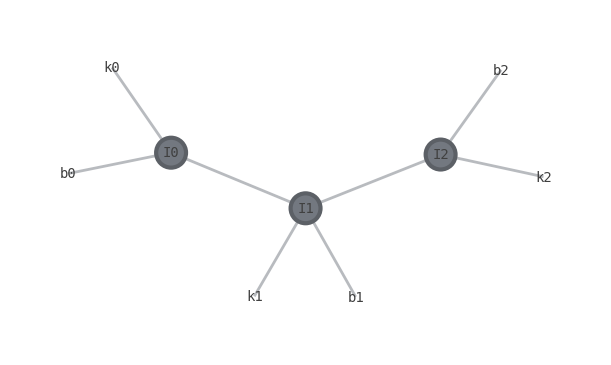

In [39]:
test = np.ones(2**8).reshape((4, 4, 4, 4))
test_L = test[0, :, :, :]
test_R = test[:, :, :, 0]
test_all = (test_L, test, test_R)
qu.tensor.MatrixProductOperator(test_all).draw()

In [26]:
A = qu.tensor.MPO_rand_herm(20, bond_dim=7, tags=['HAM'])

In [37]:
A.arrays[0].shape

(7, 2, 2)

In [8]:
dx_block = np.array([[0, 1, 0, -1], [1, 0, -1, 0], [0, 1, 0, -1], [-1, 0, 1, 0]])
dx_2d_array = np.tensordot(np.eye(4), dx_block, axes=0)

In [9]:
dx_2d_array

array([[[[ 0.,  1.,  0., -1.],
         [ 1.,  0., -1.,  0.],
         [ 0.,  1.,  0., -1.],
         [-1.,  0.,  1.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  1.,  0., -1.],
         [ 1.,  0., -1.,  0.],
         [ 0.,  1.,  0., -1.],
         [-1.,  0.,  1.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.